In [32]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

def reduce_mem_usage(df):

    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

data = pd.read_csv('delete3_2.csv', sep=',')
data = reduce_mem_usage(data)

Memory usage of dataframe is 30368.00 MB
Memory usage after optimization is: 7688.00 MB
Decreased by 74.7%


In [33]:
Y1 = data['y1']
Y2 = data['y2']
X = data[['x320', 'x182', 'x61', 'x54', 'x239', 'x244']]

In [34]:
clf1 = Ridge()
clf1.fit(X, Y1)
clf2 = Ridge()
clf2.fit(X, Y2)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
x = np.array([0.6895, 270.3794, 369.3962, 61.52, 8.8463, -0.4479]).reshape(1, -1)
result = []

In [91]:
y_pred = clf2.predict(x)
result.append(y_pred)
for i in range(150):
    if x[0][0]<300:
        x[0][0] = x[0][0]+2
    if x[0][1]>1.5:
        x[0][1] = x[0][1]-10
    if x[0][2]>362.9693:
        x[0][2] = x[0][2] - 1
    if x[0][3]>35:
        x[0][3] = x[0][3] - 1
    if x[0][4]<12:
        x[0][4] = x[0][4] + 1
    if x[0][5]<25:
        x[0][5] = x[0][5] + 1
    result.append(clf2.predict(x))


In [92]:
result = pd.DataFrame(result)

In [93]:
x

array([[300.6895,   0.3794, 362.3962,  34.52  ,  12.8463,  25.5521]])

In [70]:
x1 = pd.DataFrame([89.40 for i in range(151)])

In [75]:
result_end = x1 - result

In [76]:
result_end.to_csv('133产品辛烷值.csv')

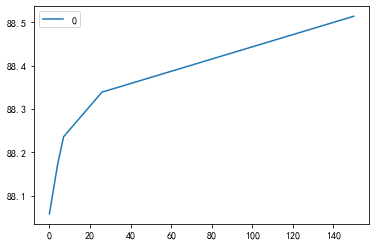

In [77]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
result_end.plot()
plt.show()

In [87]:
x = np.array([0.6895, 270.3794, 369.3962, 61.52, 8.8463, -0.4479]).reshape(1, -1)
result_s = []
y_s_pred = clf1.predict(x)
result_s.append(y_s_pred)
for i in range(131):
    if x[0][0]<300:
        x[0][0] = x[0][0]+2
    if x[0][1]>1.5:
        x[0][1] = x[0][1]-10
    if x[0][2]>362.9693:
        x[0][2] = x[0][2] - 1
    if x[0][3]>35:
        x[0][3] = x[0][3] - 1
    if x[0][4]<12:
        x[0][4] = x[0][4] + 1
    if x[0][5]<25:
        x[0][5] = x[0][5] + 1
    result_s.append(clf1.predict(x))

In [95]:
result_s = pd.DataFrame(result_s)
result_s.to_csv('133号硫含量.csv')

In [89]:
x

array([[262.6895,   0.3794, 362.3962,  34.52  ,  12.8463,  25.5521]])

In [111]:
result_single_320 = []

In [112]:
x_single_xinwan = np.array([0.6895, 270.3794, 369.3962, 61.52, 8.8463, -0.4479]).reshape(1, -1)
result_single_320.append(clf2.predict(x_single_xinwan))
for i in range (150):
    x_single_xinwan[0][0] = x_single_xinwan[0][0] + 2
    result_single_320.append(clf2.predict(x_single_xinwan))

In [113]:
result_single_320 = pd.DataFrame(restut_single_xinwan)
result_single_320.to_csv('预测辛烷只变x320.csv')

In [114]:
result_single_182 = []
x_single_xinwan = np.array([0.6895, 270.3794, 369.3962, 61.52, 8.8463, -0.4479]).reshape(1, -1)
result_single_182.append(clf2.predict(x_single_xinwan))
for i in range(27):
    x_single_xinwan[0][1] = x_single_xinwan[0][1] - 10
    result_single_182.append(clf2.predict(x_single_xinwan))
result_single_182 = pd.DataFrame(restut_single_xinwan)
result_single_182.to_csv('预测辛烷只变x182.csv')

SyntaxError: unexpected EOF while parsing (<ipython-input-114-0e0ab1f19f6d>, line 4)